In [15]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, TimeDistributed, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
path = '/content/drive/MyDrive/mhealth_full.csv'
df= pd.read_csv(path)
df

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
0,-9.8184,0.009971,0.29563,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,...,-4.5781,0.187760,-0.449020,-1.01030,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,...,-4.3198,0.023595,-0.449020,-1.01030,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,...,-4.2772,0.275720,-0.449020,-1.01030,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,...,-4.3163,0.367520,-0.456860,-1.00820,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,...,-4.1459,0.407290,-0.456860,-1.00820,0.025862,-0.53684,0.175900,-1.095500,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,-9.2476,-0.248070,-2.62230,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-0.687640,...,-8.9071,0.294230,0.041176,-0.99384,-0.480600,2.40890,7.496100,7.915500,0,subject10
1215741,-9.4632,-0.073513,-2.11190,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-0.868190,...,-8.7455,0.448140,0.041176,-0.99384,-0.480600,1.69450,7.866000,7.897500,0,subject10
1215742,-9.4011,-0.144580,-3.02350,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-0.868410,...,-9.1155,0.450480,0.041176,-0.99384,-0.480600,1.15770,8.052800,7.884900,0,subject10
1215743,-9.3732,-0.026252,-2.70760,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-0.339790,...,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0.27441,9.487900,5.325800,0,subject10


In [19]:
columns = ['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z',
       'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z',
       'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z',
       'mag_rw_x', 'mag_rw_y', 'mag_rw_z']


In [20]:
def scaler(data, columns):

  for column in columns:
        data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
  return data
df = scaler(df, columns)

    0: 'Null',
    1: 'Standing still',
    2: 'Sitting and relaxing',
    3: 'Lying down',
    4: 'Walking',
    5: 'Climbing stairs',
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms',
    8: 'Knees bending (crouching)',
    9: 'Cycling',
    10: 'Jogging',
    11: 'Running',
    12: 'Jump front & back'

In [21]:
#df_activity_1 = df[df['activity'] == 1]
#df_activity_2 = df[df['activity'] == 2]
#df_activity_3 = df[df['activity'] == 3]
df_activity_4 = df[df['activity'] == 4]
df_activity_5 = df[df['activity'] == 5]
df_activity_6 = df[df['activity'] == 6]
df_activity_7 = df[df['activity'] == 7]
df_activity_8 = df[df['activity'] == 8]
df_activity_9 = df[df['activity'] == 9]
df_activity_10 = df[df['activity'] == 10]
df_activity_11 = df[df['activity'] == 11]
df_activity_12 = df[df['activity'] == 12]

In [22]:
df = pd.concat([df_activity_4, df_activity_5, df_activity_6, df_activity_7,
                df_activity_8, df_activity_9, df_activity_10, df_activity_11,df_activity_12])

In [23]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['activity']=label.fit_transform(df['activity'])

In [24]:
df.activity.value_counts()

0    30720
1    30720
5    30720
6    30720
7    30720
3    29441
4    29337
2    28315
8    10342
Name: activity, dtype: int64

In [25]:
X = df.drop(['activity', 'subject'], axis=1)
y = df['activity']

In [26]:
TIME_PERIODS = 50
STEP_DISTANCE = 25
LABEL = 'activity'

def create_segments_and_labels(data, time_steps, step, label_name, columns):
    pd.options.mode.chained_assignment = None  # default='warn'
    N_FEATURES = len(columns)
    # make segments
    segments = []
    labels = []
    for i in range(0, len(data) - time_steps, step):
        segment = []
        for column in columns:
            segment.append(data[column].values[i: i + time_steps])
        segments.append(segment)
        label = stats.mode(data[label_name][i: i + time_steps])[0]
        labels.append(label)
    segments = np.asarray(segments, dtype= np.float32)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    print('reshaped_segments shape : ', reshaped_segments.shape)
    labels = np.asarray(labels)
    print('labels shape :', labels.shape)
    return reshaped_segments, labels
X_data, y_data = create_segments_and_labels(df, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)

reshaped_segments shape :  (10040, 50, 21)
labels shape : (10040,)


In [27]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1, stratify=  y_data)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8032, 50, 21), (2008, 50, 21), (8032,), (2008,))

In [29]:
# Scale train/ test predictors based on training data
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [30]:
# Create train and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1,stratify=  y_train)

In [33]:
# Convert output variables to categorical for CNN
y_train = to_categorical(y_train)
print(y_train.shape)

y_test = to_categorical(y_test)
print(y_test.shape)

y_val = to_categorical(y_val)
print(y_val.shape)

(6425, 9)
(2008, 9)
(1607, 9)



# CNN- LSTM


In [34]:
#Epoch 500

BATCH_SIZE = 32

verbose,epochs,batch_size=1,10, BATCH_SIZE
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
n_timesteps,n_features,n_outputs

(50, 21, 9)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [41]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        #0: 'Lying down',
        #1: 'Standing still',
        #2: 'Sitting and relaxing'
        3: 'Walking',
        4: 'Climbing stairs',
        5: 'Waist bends forward',
        6: 'Frontal elevation of arms',
        7: 'Knees bending (crouching)',
        8: 'Cycling',
        9: 'Jogging',
        10: 'Running',
        11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

# Layer3

# CNN1 - LSTM2

In [35]:

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 64)            4096      
                                                                 
 dropout (Dropout)           (None, 48, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 24, 64)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 24, 100)           66000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                        

In [36]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 23s 26ms/step - loss: 0.9124 - accuracy: 0.6375 - val_loss: 0.4374 - val_accuracy: 0.8133
Epoch 2/10
201/201 [==============================] - 2s 8ms/step - loss: 0.3973 - accuracy: 0.8492 - val_loss: 0.2515 - val_accuracy: 0.9011
Epoch 3/10
201/201 [==============================] - 3s 16ms/step - loss: 0.3046 - accuracy: 0.8886 - val_loss: 0.2398 - val_accuracy: 0.9073
Epoch 4/10
201/201 [==============================] - 3s 15ms/step - loss: 0.2407 - accuracy: 0.9150 - val_loss: 0.1401 - val_accuracy: 0.9415
Epoch 5/10
201/201 [==============================] - 3s 17ms/step - loss: 0.1839 - accuracy: 0.9349 - val_loss: 0.1657 - val_accuracy: 0.9396
Epoch 6/10
201/201 [==============================] - 4s 20ms/step - loss: 0.1625 - accuracy: 0.9429 - val_loss: 0.0917 - val_accuracy: 0.9652
Epoch 7/10
201/201 [==============================] - 3s 15ms/step - loss: 0.1393 - accuracy: 0.9532 - val_loss: 0.1148 - val_accuracy: 0.9620

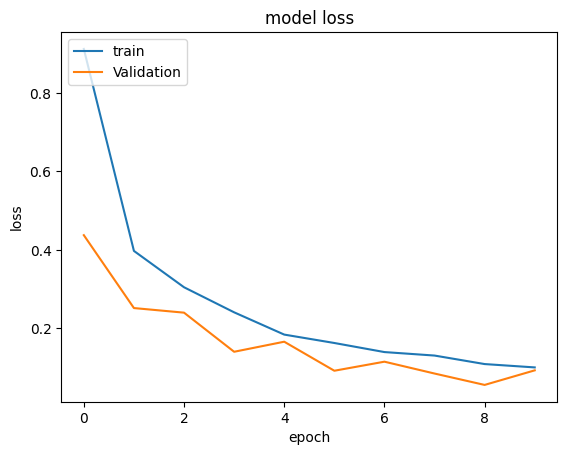

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [38]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

63/63 [==============================] - 1s 4ms/step


(2008, 1)

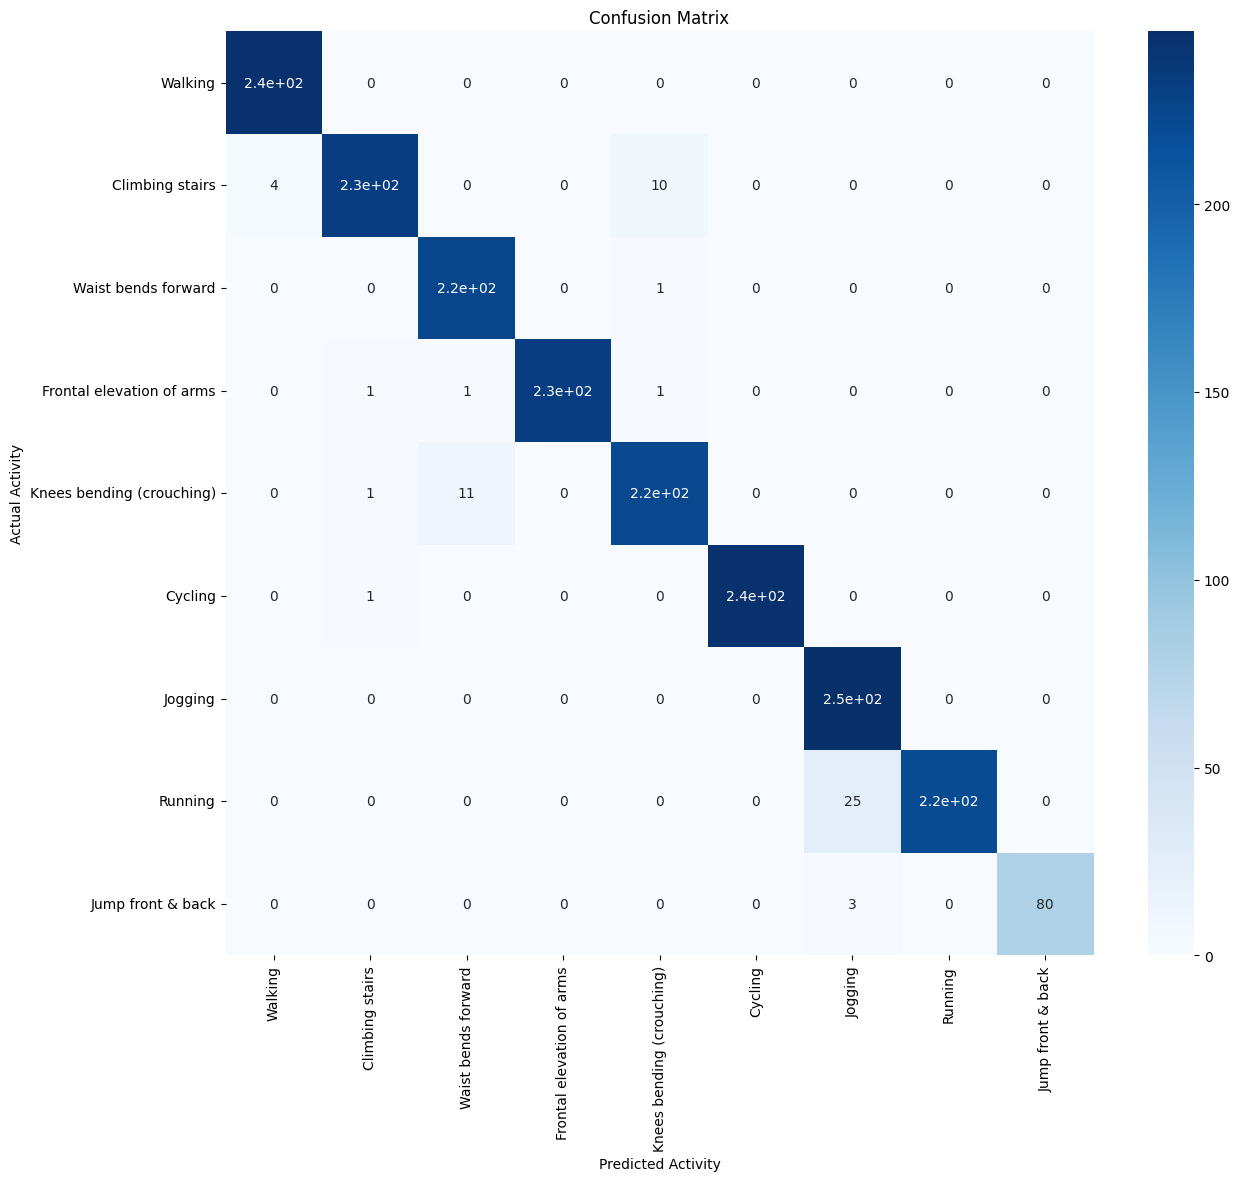

Accuracy Score: 97.0618%
Precision Score: 97.4143%
Recall Score: 97.0333%
F_1 Score: 97.1464%


In [40]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2 - LSTM1

In [42]:

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 48, 64)            4096      
                                                                 
 conv1d_2 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 dropout_2 (Dropout)         (None, 46, 64)            0         
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 23, 64)            0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 100)               66000     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                      

In [ ]:

# define model
#model = Sequential()
#model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
#model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))

#model.add(TimeDistributed(Dropout(0.5)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

#model.add(TimeDistributed(Flatten()))


#model.add(LSTM(100))
#model.add(Dropout(0.5))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(n_outputs, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()

In [43]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 6s 14ms/step - loss: 0.9985 - accuracy: 0.6087 - val_loss: 0.5466 - val_accuracy: 0.7928
Epoch 2/10
201/201 [==============================] - 2s 12ms/step - loss: 0.4204 - accuracy: 0.8384 - val_loss: 0.8595 - val_accuracy: 0.7019
Epoch 3/10
201/201 [==============================] - 2s 12ms/step - loss: 0.3142 - accuracy: 0.8792 - val_loss: 0.2131 - val_accuracy: 0.9235
Epoch 4/10
201/201 [==============================] - 2s 11ms/step - loss: 0.2630 - accuracy: 0.9054 - val_loss: 0.3952 - val_accuracy: 0.8569
Epoch 5/10
201/201 [==============================] - 2s 12ms/step - loss: 0.1875 - accuracy: 0.9346 - val_loss: 0.2970 - val_accuracy: 0.9166
Epoch 6/10
201/201 [==============================] - 3s 14ms/step - loss: 0.1615 - accuracy: 0.9415 - val_loss: 0.2682 - val_accuracy: 0.9029
Epoch 7/10
201/201 [==============================] - 3s 15ms/step - loss: 0.1374 - accuracy: 0.9535 - val_loss: 0.1998 - val_accuracy: 0.9415

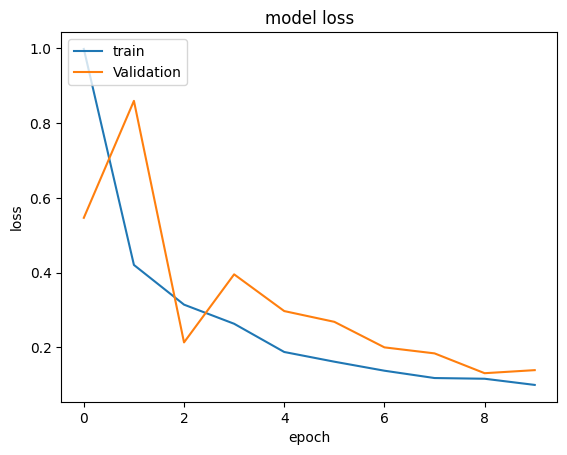

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [45]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

63/63 [==============================] - 1s 3ms/step


(2008, 1)

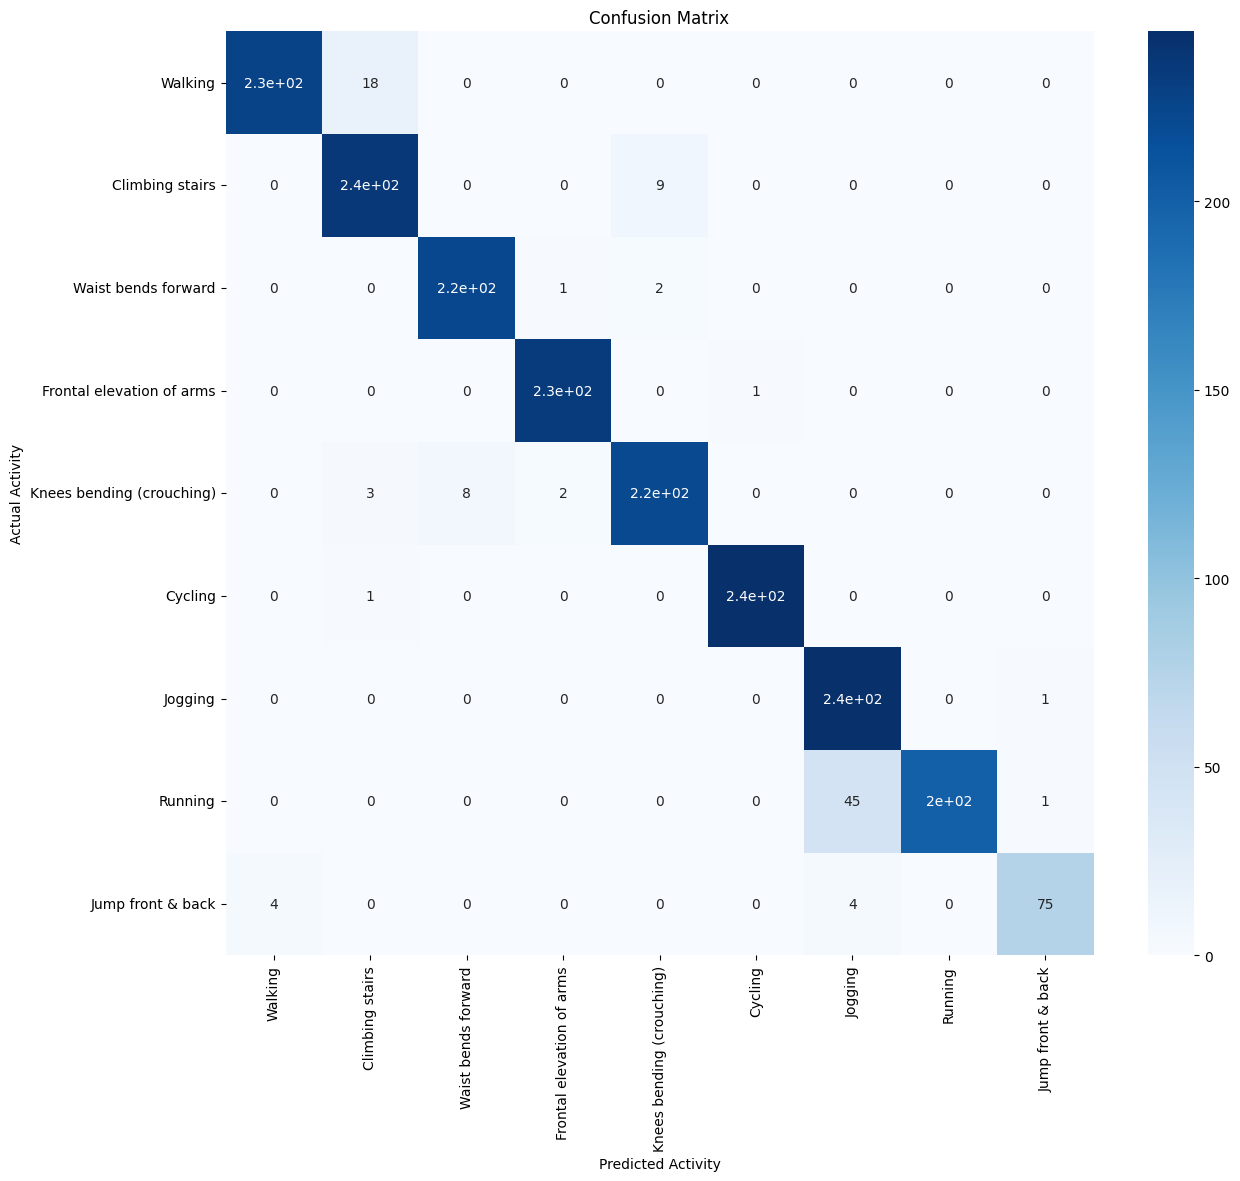

Accuracy Score: 95.0199%
Precision Score: 95.6282%
Recall Score: 94.7288%
F_1 Score: 94.9586%


In [46]:

y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# layer 4

# CNN 1 - LSTM3

In [48]:

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))

model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 48, 64)            4096      
                                                                 
 dropout_4 (Dropout)         (None, 48, 64)            0         
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 24, 100)           66000     
                                                                 
 lstm_4 (LSTM)               (None, 24, 100)           80400     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                      

In [49]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 10s 20ms/step - loss: 0.9667 - accuracy: 0.6165 - val_loss: 0.4248 - val_accuracy: 0.8513
Epoch 2/10
201/201 [==============================] - 2s 11ms/step - loss: 0.4118 - accuracy: 0.8470 - val_loss: 0.2464 - val_accuracy: 0.9172
Epoch 3/10
201/201 [==============================] - 3s 14ms/step - loss: 0.3500 - accuracy: 0.8732 - val_loss: 0.3451 - val_accuracy: 0.8482
Epoch 4/10
201/201 [==============================] - 3s 16ms/step - loss: 0.2454 - accuracy: 0.9125 - val_loss: 0.2106 - val_accuracy: 0.9179
Epoch 5/10
201/201 [==============================] - 2s 12ms/step - loss: 0.2045 - accuracy: 0.9312 - val_loss: 0.1909 - val_accuracy: 0.9328
Epoch 6/10
201/201 [==============================] - 2s 11ms/step - loss: 0.1659 - accuracy: 0.9423 - val_loss: 0.1626 - val_accuracy: 0.9378
Epoch 7/10
201/201 [==============================] - 2s 11ms/step - loss: 0.1571 - accuracy: 0.9451 - val_loss: 0.1266 - val_accuracy: 0.954

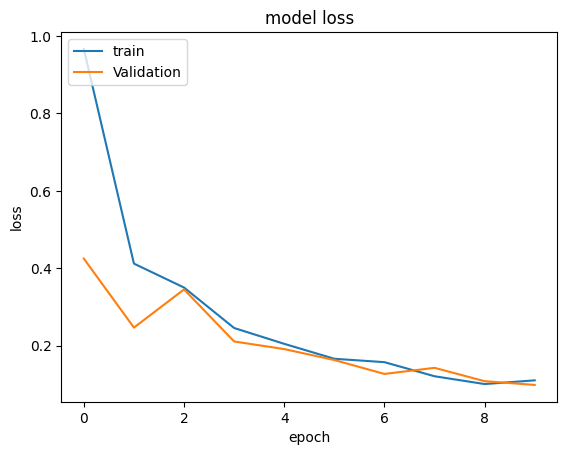

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

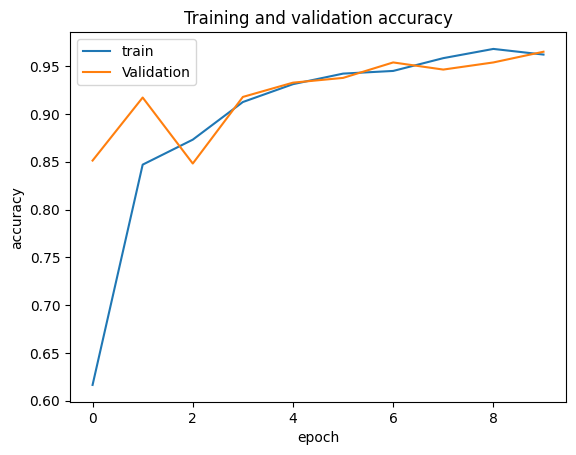

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

63/63 [==============================] - 2s 4ms/step


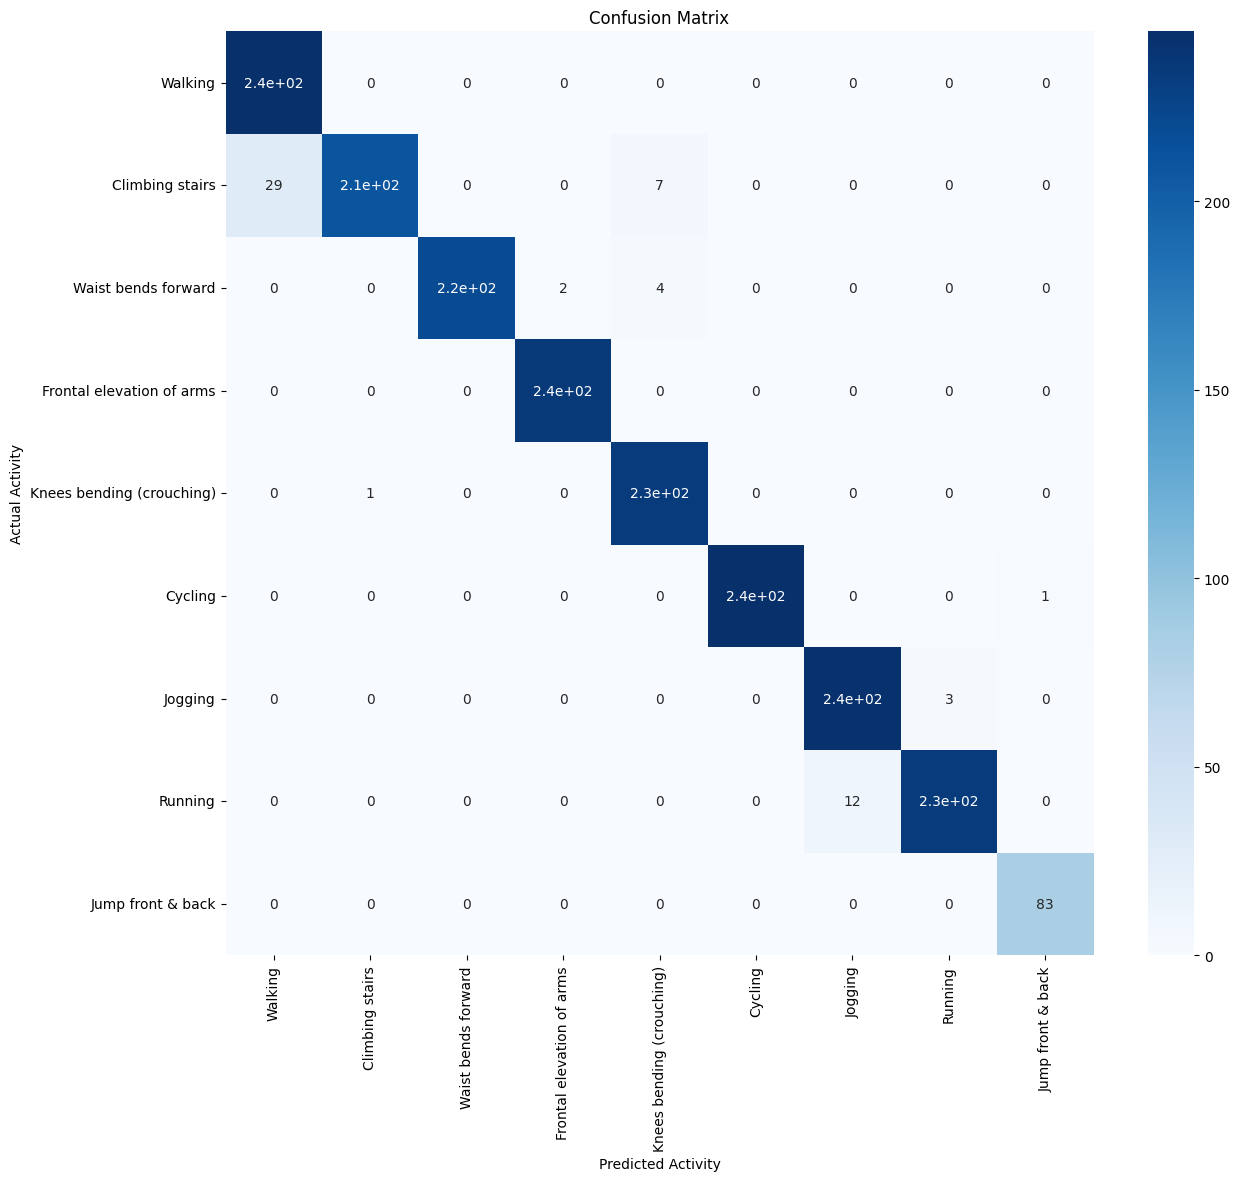

Accuracy Score: 97.0618%
Precision Score: 97.3829%
Recall Score: 97.3090%
F_1 Score: 97.2383%


In [52]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2 - LSTM2



In [53]:

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 48, 64)            4096      
                                                                 
 conv1d_5 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 dropout_6 (Dropout)         (None, 46, 64)            0         
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 23, 64)            0         
 g1D)                                                            
                                                                 
 lstm_6 (LSTM)               (None, 23, 100)           66000     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                      

In [54]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 7s 13ms/step - loss: 0.9229 - accuracy: 0.6241 - val_loss: 0.4168 - val_accuracy: 0.8245
Epoch 2/10
201/201 [==============================] - 2s 10ms/step - loss: 0.4040 - accuracy: 0.8431 - val_loss: 0.2645 - val_accuracy: 0.9029
Epoch 3/10
201/201 [==============================] - 2s 10ms/step - loss: 0.3003 - accuracy: 0.8865 - val_loss: 0.2213 - val_accuracy: 0.9085
Epoch 4/10
201/201 [==============================] - 3s 13ms/step - loss: 0.2167 - accuracy: 0.9223 - val_loss: 0.1771 - val_accuracy: 0.9353
Epoch 5/10
201/201 [==============================] - 3s 13ms/step - loss: 0.1842 - accuracy: 0.9332 - val_loss: 0.2328 - val_accuracy: 0.9147
Epoch 6/10
201/201 [==============================] - 2s 9ms/step - loss: 0.1546 - accuracy: 0.9471 - val_loss: 0.2046 - val_accuracy: 0.9085
Epoch 7/10
201/201 [==============================] - 2s 9ms/step - loss: 0.1448 - accuracy: 0.9518 - val_loss: 0.2543 - val_accuracy: 0.9110
E

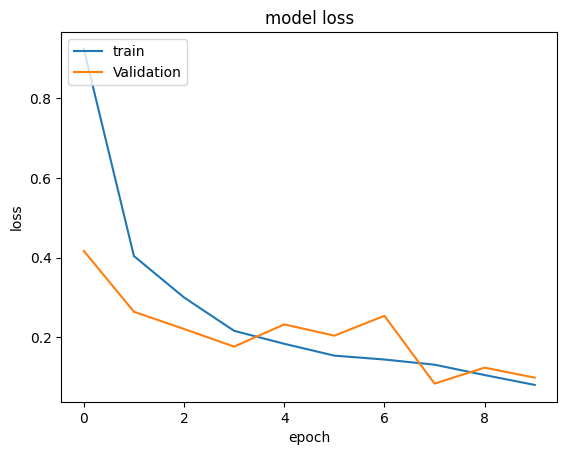

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

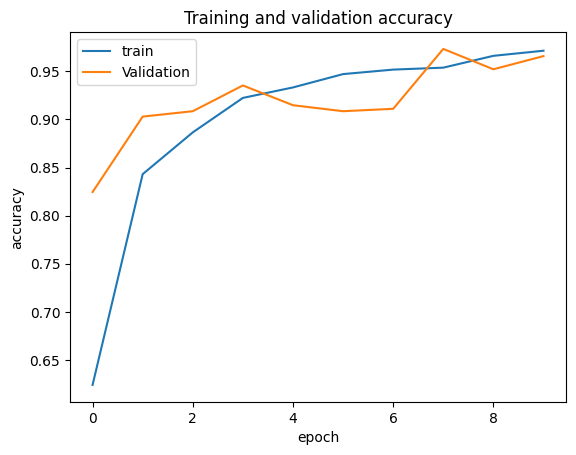

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

63/63 [==============================] - 1s 3ms/step


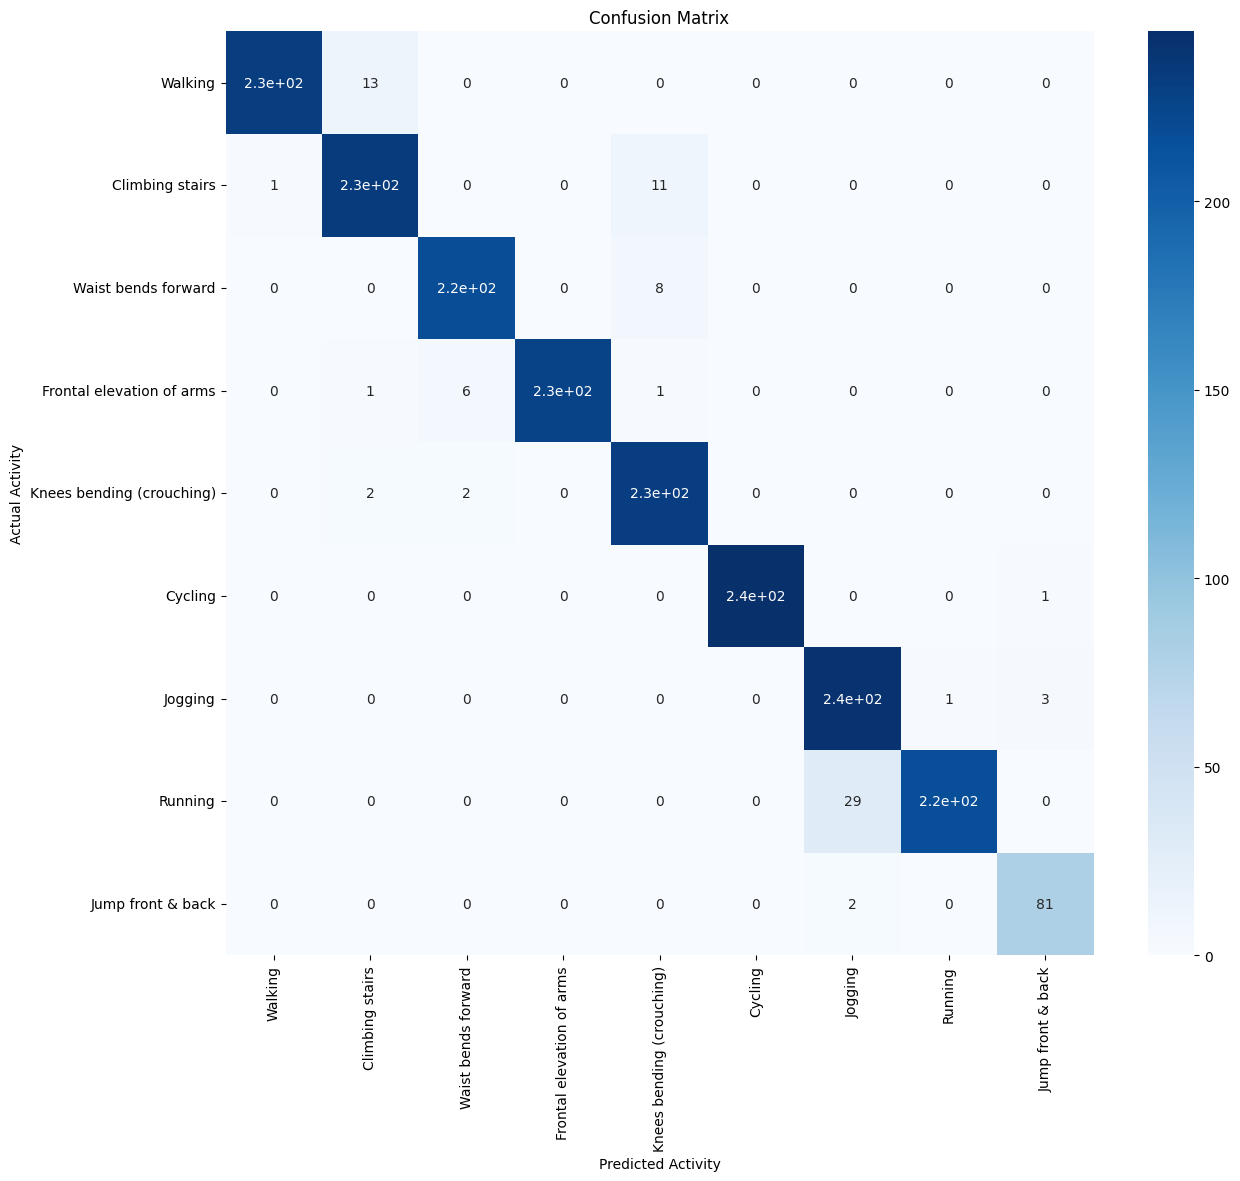

Accuracy Score: 95.9661%
Precision Score: 96.1270%
Recall Score: 96.1043%
F_1 Score: 96.0258%


In [57]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN3 - LSTM1

In [64]:

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 48, 64)            4096      
                                                                 
 conv1d_10 (Conv1D)          (None, 46, 64)            12352     
                                                                 
 dropout_11 (Dropout)        (None, 46, 64)            0         
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 23, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 21, 64)            12352     
                                                                 
 dropout_12 (Dropout)        (None, 21, 64)            0         
                                                      

In [65]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 7s 16ms/step - loss: 0.9842 - accuracy: 0.6089 - val_loss: 0.9380 - val_accuracy: 0.6403
Epoch 2/10
201/201 [==============================] - 2s 12ms/step - loss: 0.4784 - accuracy: 0.8151 - val_loss: 1.2240 - val_accuracy: 0.5320
Epoch 3/10
201/201 [==============================] - 2s 12ms/step - loss: 0.3643 - accuracy: 0.8627 - val_loss: 0.6188 - val_accuracy: 0.7411
Epoch 4/10
201/201 [==============================] - 2s 10ms/step - loss: 0.3032 - accuracy: 0.8844 - val_loss: 0.7946 - val_accuracy: 0.7187
Epoch 5/10
201/201 [==============================] - 2s 9ms/step - loss: 0.2529 - accuracy: 0.9079 - val_loss: 1.0814 - val_accuracy: 0.6534
Epoch 6/10
201/201 [==============================] - 2s 9ms/step - loss: 0.2099 - accuracy: 0.9225 - val_loss: 0.4992 - val_accuracy: 0.7965
Epoch 7/10
201/201 [==============================] - 2s 9ms/step - loss: 0.2172 - accuracy: 0.9244 - val_loss: 0.6140 - val_accuracy: 0.7511
Ep

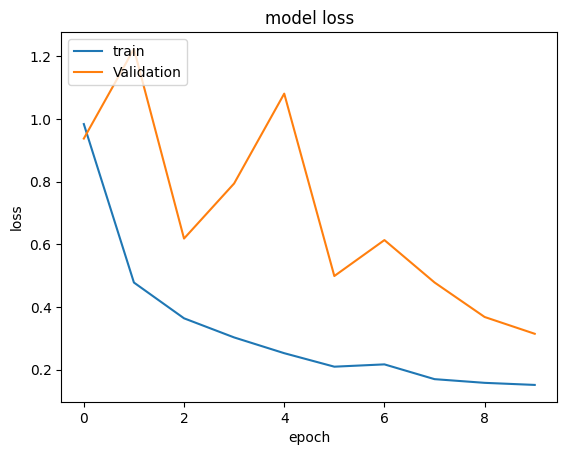

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

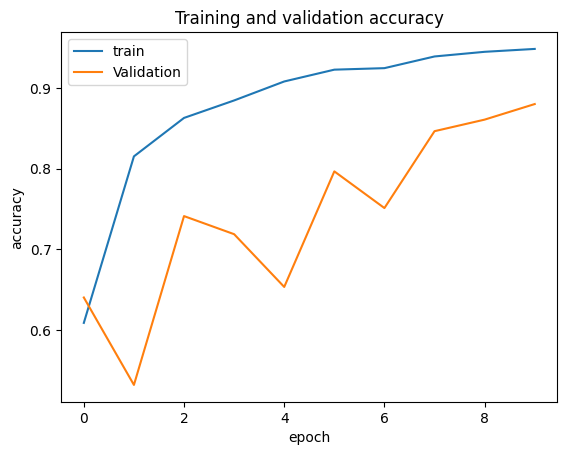

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

63/63 [==============================] - 1s 3ms/step


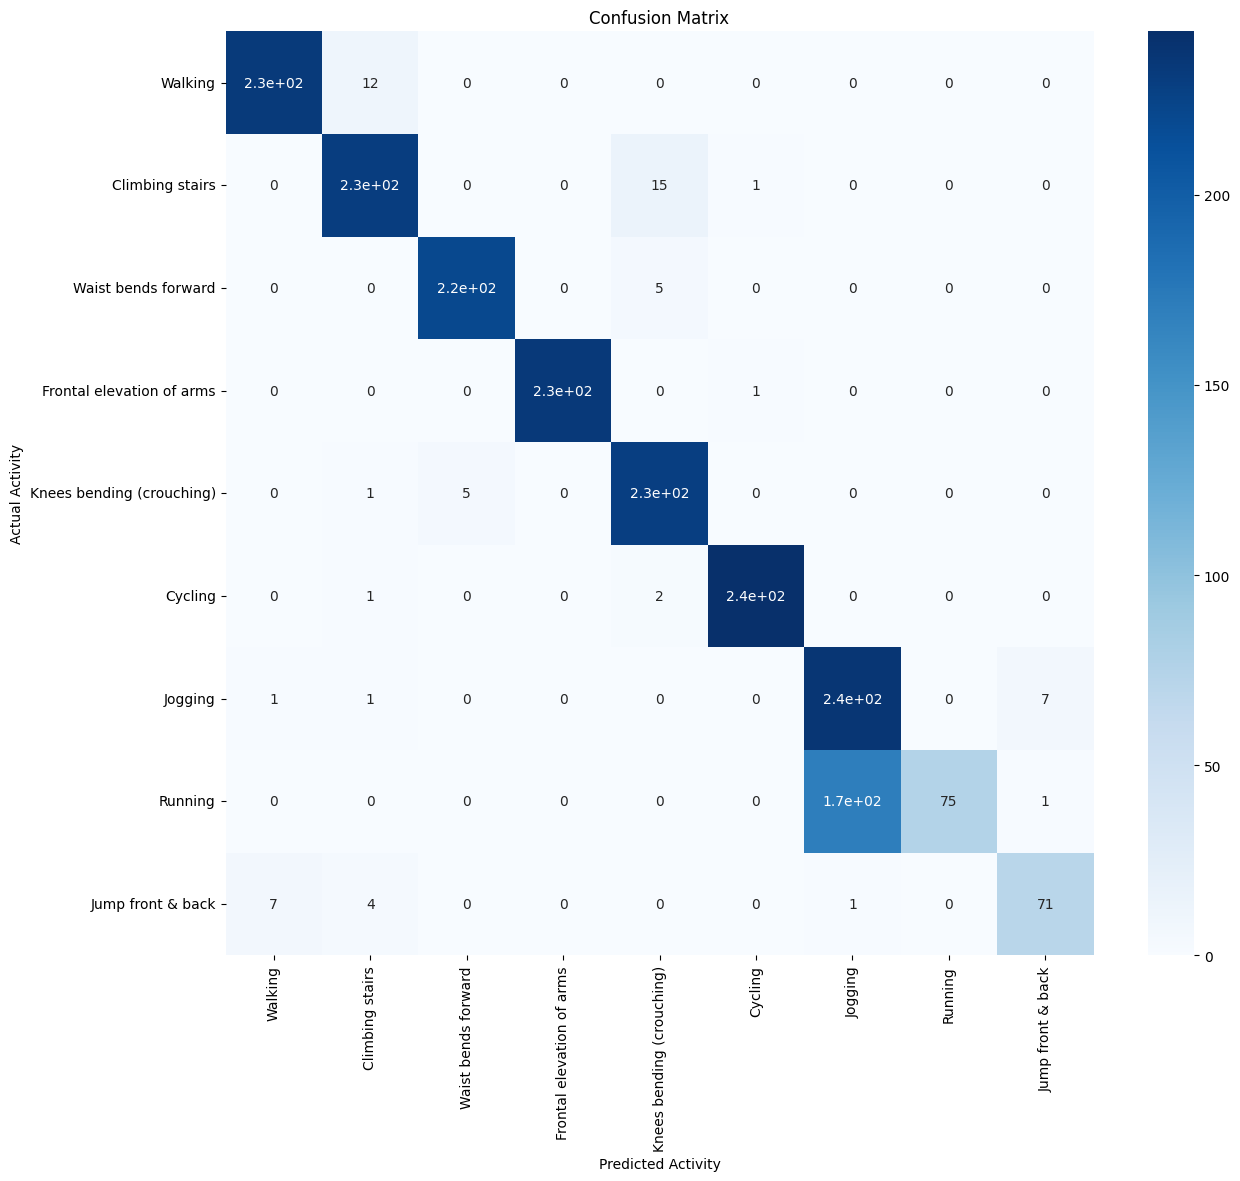

Accuracy Score: 88.2968%
Precision Score: 91.6909%
Recall Score: 88.2843%
F_1 Score: 87.3855%


In [68]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# Layer5

# CNN4 - LSTM1

In [69]:

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 48, 64)            4096      
                                                                 
 conv1d_13 (Conv1D)          (None, 46, 64)            12352     
                                                                 
 dropout_14 (Dropout)        (None, 46, 64)            0         
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 23, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 21, 64)            12352     
                                                                 
 conv1d_15 (Conv1D)          (None, 19, 64)            12352     
                                                      

In [70]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 8s 14ms/step - loss: 0.9618 - accuracy: 0.6112 - val_loss: 0.9351 - val_accuracy: 0.5980
Epoch 2/10
201/201 [==============================] - 2s 10ms/step - loss: 0.4524 - accuracy: 0.8307 - val_loss: 0.6047 - val_accuracy: 0.7486
Epoch 3/10
201/201 [==============================] - 2s 12ms/step - loss: 0.3395 - accuracy: 0.8716 - val_loss: 0.7099 - val_accuracy: 0.7175
Epoch 4/10
201/201 [==============================] - 3s 13ms/step - loss: 0.3066 - accuracy: 0.8925 - val_loss: 0.5605 - val_accuracy: 0.7573
Epoch 5/10
201/201 [==============================] - 2s 11ms/step - loss: 0.2354 - accuracy: 0.9160 - val_loss: 0.9664 - val_accuracy: 0.6882
Epoch 6/10
201/201 [==============================] - 2s 10ms/step - loss: 0.2071 - accuracy: 0.9251 - val_loss: 1.3253 - val_accuracy: 0.6727
Epoch 7/10
201/201 [==============================] - 2s 9ms/step - loss: 0.1854 - accuracy: 0.9368 - val_loss: 0.7597 - val_accuracy: 0.7088


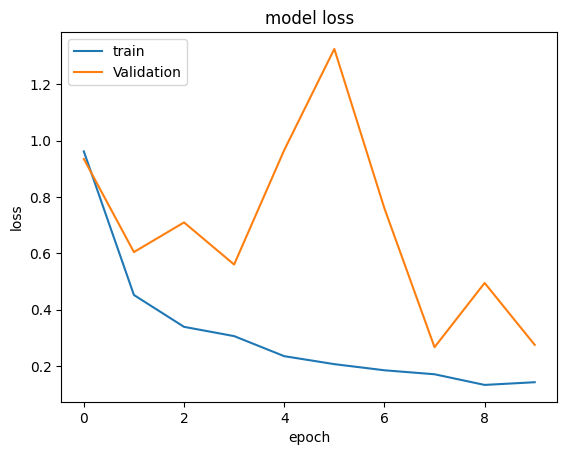

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

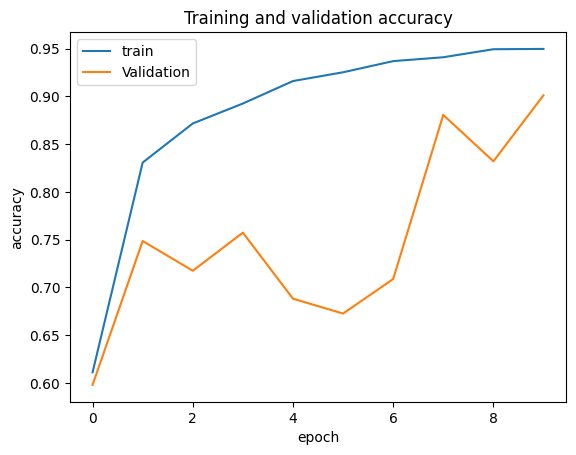

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

63/63 [==============================] - 1s 3ms/step


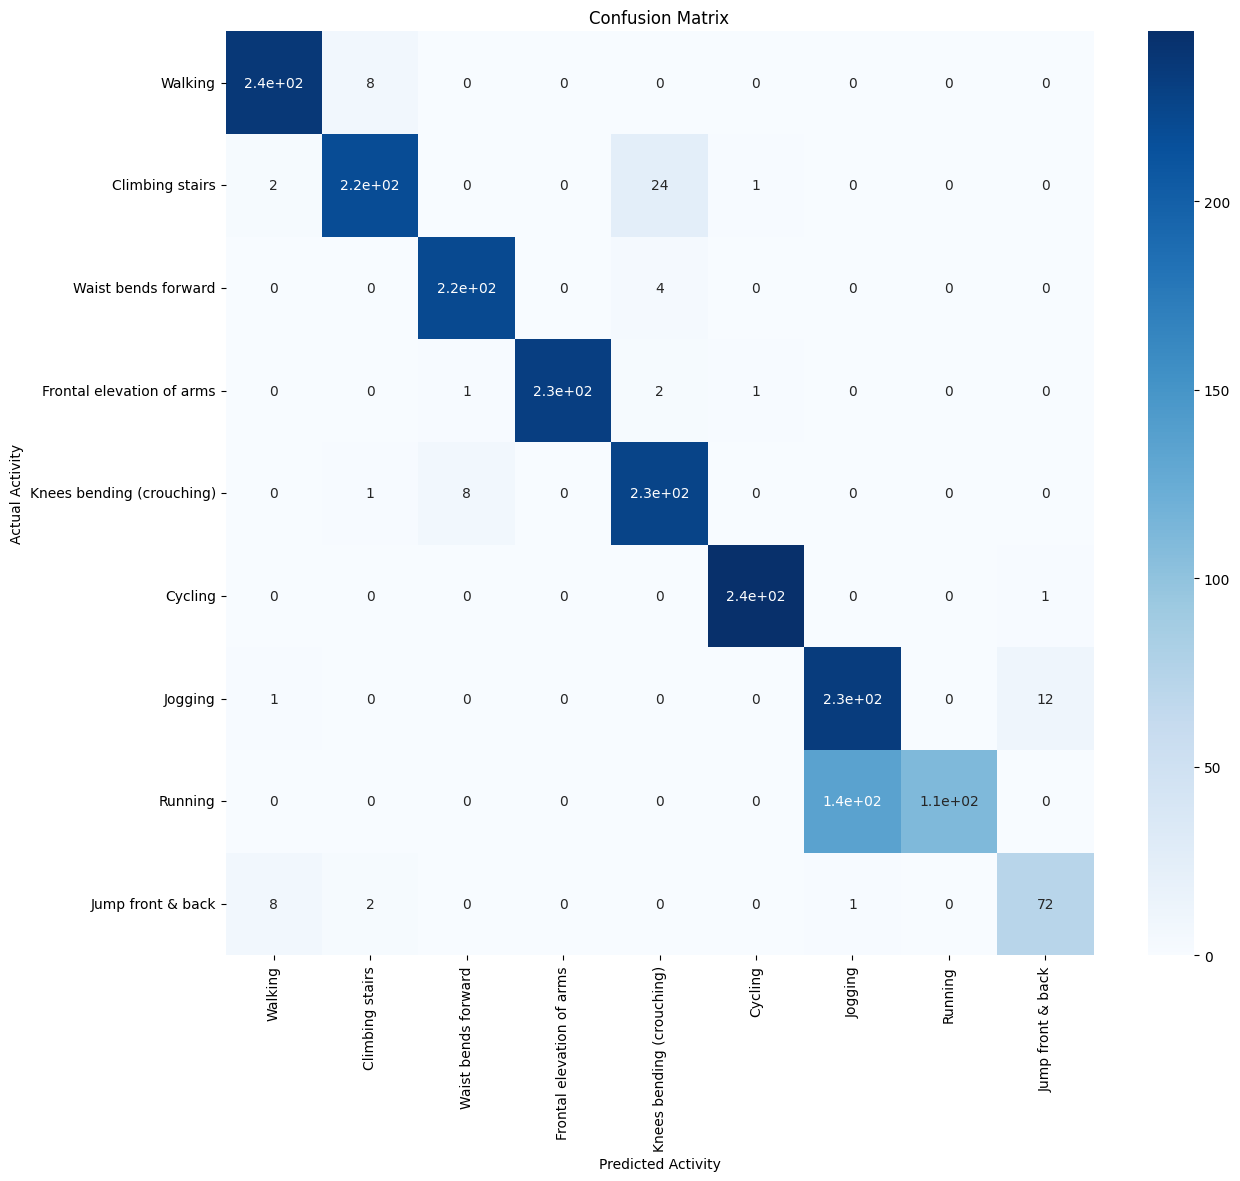

Accuracy Score: 89.4422%
Precision Score: 91.3563%
Recall Score: 89.4039%
F_1 Score: 88.8422%


In [73]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# timedistributed

In [ ]:
n_steps = 2
n_features = X_train.shape[2]
n_length = 25

X_train = X_train.reshape((X_train.shape[0], n_steps, n_length, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, n_features))
X_val = X_val.reshape((X_val.shape[0], n_steps, n_length, n_features))

In [ ]:
print(X_train.shape, y_train.shape)

(6425, 2, 25, 21) (6425,)


In [ ]:
# Convert output variables to categorical for CNN
y_train = to_categorical(y_train)
print(y_train.shape)

y_test = to_categorical(y_test)
print(y_test.shape)

y_val = to_categorical(y_val)
print(y_val.shape)

(6425, 9)
(2008, 9)
(1607, 9)


In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6425, 2, 25, 21) (6425, 9) (2008, 2, 25, 21) (2008, 9)


In [ ]:
# Produce variables for CNN input/output shape
#Epoch 500
n_timesteps, n_features, n_outputs = n_steps * n_length, X_train.shape[3], y_train.shape[1]
#n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
n_timesteps,n_features,n_outputs

(50, 21, 9)

# Training

# CNN1 - LSTM1

In [ ]:
# Model 1
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Dropout(0.5)))

model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, None, 23, 64)      4096      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, None, 23, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, None, 11, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, None, 704)         0         
 stributed)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               3

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 15s 9ms/step - loss: 0.7411 - accuracy: 0.7351 - val_loss: 0.1834 - val_accuracy: 0.9347
Epoch 2/10
201/201 [==============================] - 1s 6ms/step - loss: 0.2300 - accuracy: 0.9142 - val_loss: 0.0988 - val_accuracy: 0.9589
Epoch 3/10
201/201 [==============================] - 1s 7ms/step - loss: 0.1492 - accuracy: 0.9461 - val_loss: 0.0686 - val_accuracy: 0.9782
Epoch 4/10
201/201 [==============================] - 1s 6ms/step - loss: 0.1163 - accuracy: 0.9563 - val_loss: 0.0366 - val_accuracy: 0.9888
Epoch 5/10
201/201 [==============================] - 1s 6ms/step - loss: 0.0901 - accuracy: 0.9703 - val_loss: 0.0438 - val_accuracy: 0.9857
Epoch 6/10
201/201 [==============================] - 1s 6ms/step - loss: 0.0876 - accuracy: 0.9653 - val_loss: 0.0353 - val_accuracy: 0.9876
Epoch 7/10
201/201 [==============================] - 1s 7ms/step - loss: 0.0672 - accuracy: 0.9767 - val_loss: 0.0239 - val_accuracy: 0.9932
Epoch

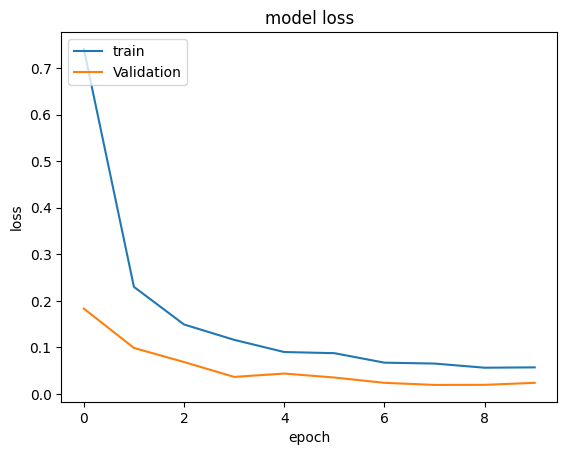

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

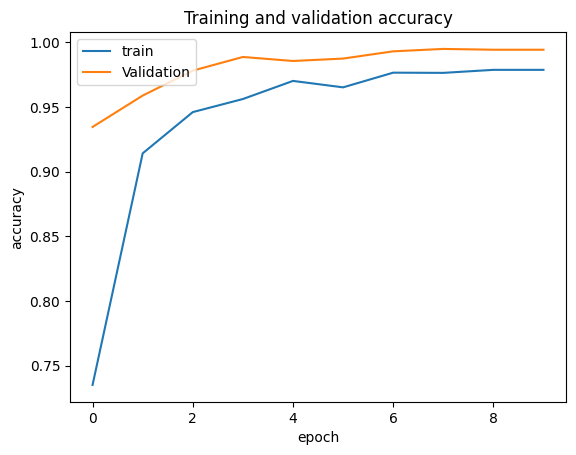

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

63/63 [==============================] - 1s 4ms/step


(2008, 1)

In [ ]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        #0: 'Lying down',
        #1: 'Standing still',
        #2: 'Sitting and relaxing'
        3: 'Walking',
        4: 'Climbing stairs',
        5: 'Waist bends forward',
        6: 'Frontal elevation of arms',
        7: 'Knees bending (crouching)',
        8: 'Cycling',
        9: 'Jogging',
        10: 'Running',
        11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

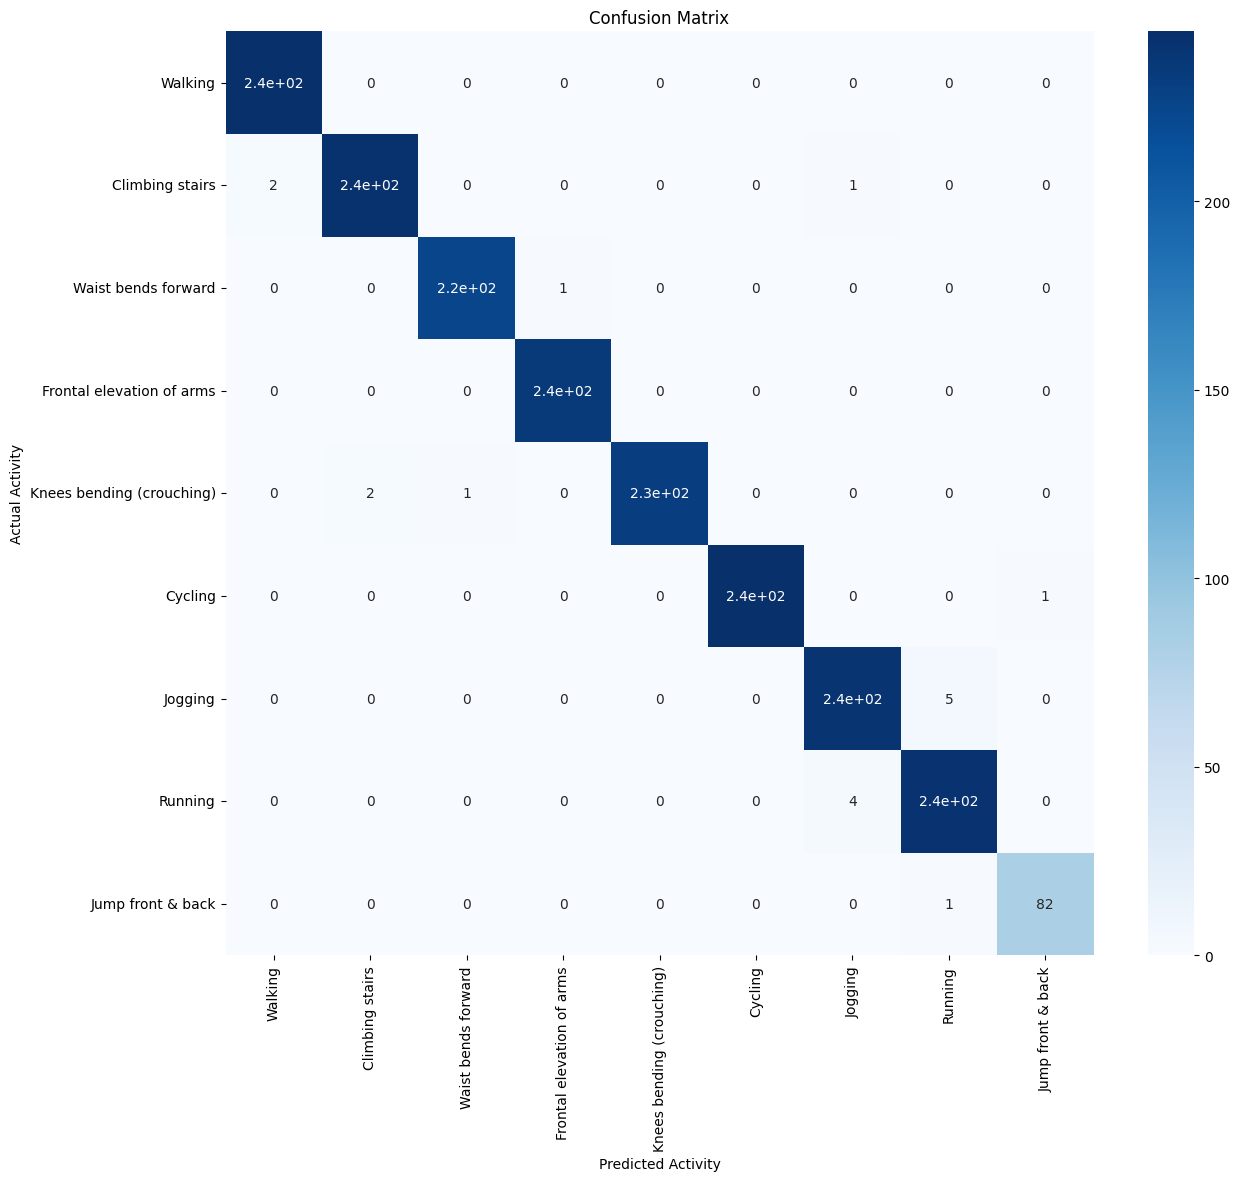

Accuracy Score: 99.1036%
Precision Score: 99.0946%
Recall Score: 99.0880%
F_1 Score: 99.0903%


In [ ]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN1 - LSTM2

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDi  (None, None, 23, 64)      4096      
 stributed)                                                      
                                                                 
 time_distributed_5 (TimeDi  (None, None, 23, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_6 (TimeDi  (None, None, 11, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_7 (TimeDi  (None, None, 704)         0         
 stributed)                                                      
                                                                 
 lstm_1 (LSTM)               (None, None, 100)        

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 9s 17ms/step - loss: 0.8389 - accuracy: 0.7037 - val_loss: 0.1706 - val_accuracy: 0.9384
Epoch 2/10
201/201 [==============================] - 2s 9ms/step - loss: 0.2392 - accuracy: 0.9138 - val_loss: 0.0657 - val_accuracy: 0.9714
Epoch 3/10
201/201 [==============================] - 2s 12ms/step - loss: 0.1762 - accuracy: 0.9359 - val_loss: 0.0696 - val_accuracy: 0.9708
Epoch 4/10
201/201 [==============================] - 2s 11ms/step - loss: 0.1282 - accuracy: 0.9539 - val_loss: 0.0663 - val_accuracy: 0.9720
Epoch 5/10
201/201 [==============================] - 2s 12ms/step - loss: 0.1183 - accuracy: 0.9591 - val_loss: 0.0313 - val_accuracy: 0.9900
Epoch 6/10
201/201 [==============================] - 2s 8ms/step - loss: 0.0926 - accuracy: 0.9686 - val_loss: 0.0327 - val_accuracy: 0.9857
Epoch 7/10
201/201 [==============================] - 2s 12ms/step - loss: 0.0772 - accuracy: 0.9742 - val_loss: 0.0183 - val_accuracy: 0.9919
E

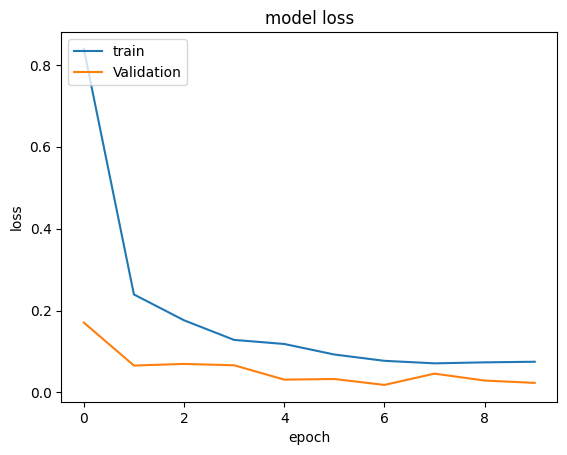

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

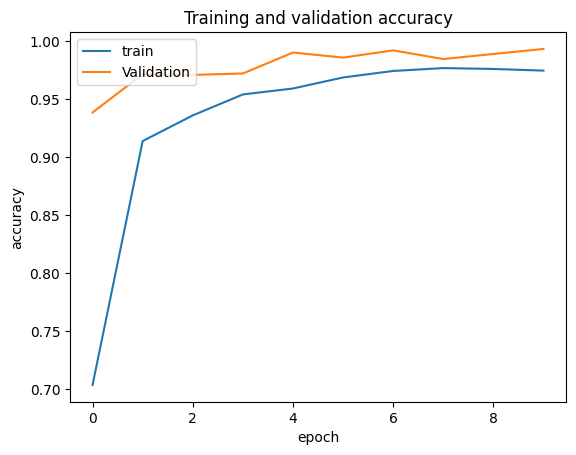

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

63/63 [==============================] - 1s 3ms/step


(2008, 1)

In [ ]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        #0: 'Lying down',
        #1: 'Standing still',
        #2: 'Sitting and relaxing'
        3: 'Walking',
        4: 'Climbing stairs',
        5: 'Waist bends forward',
        6: 'Frontal elevation of arms',
        7: 'Knees bending (crouching)',
        8: 'Cycling',
        9: 'Jogging',
        10: 'Running',
        11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

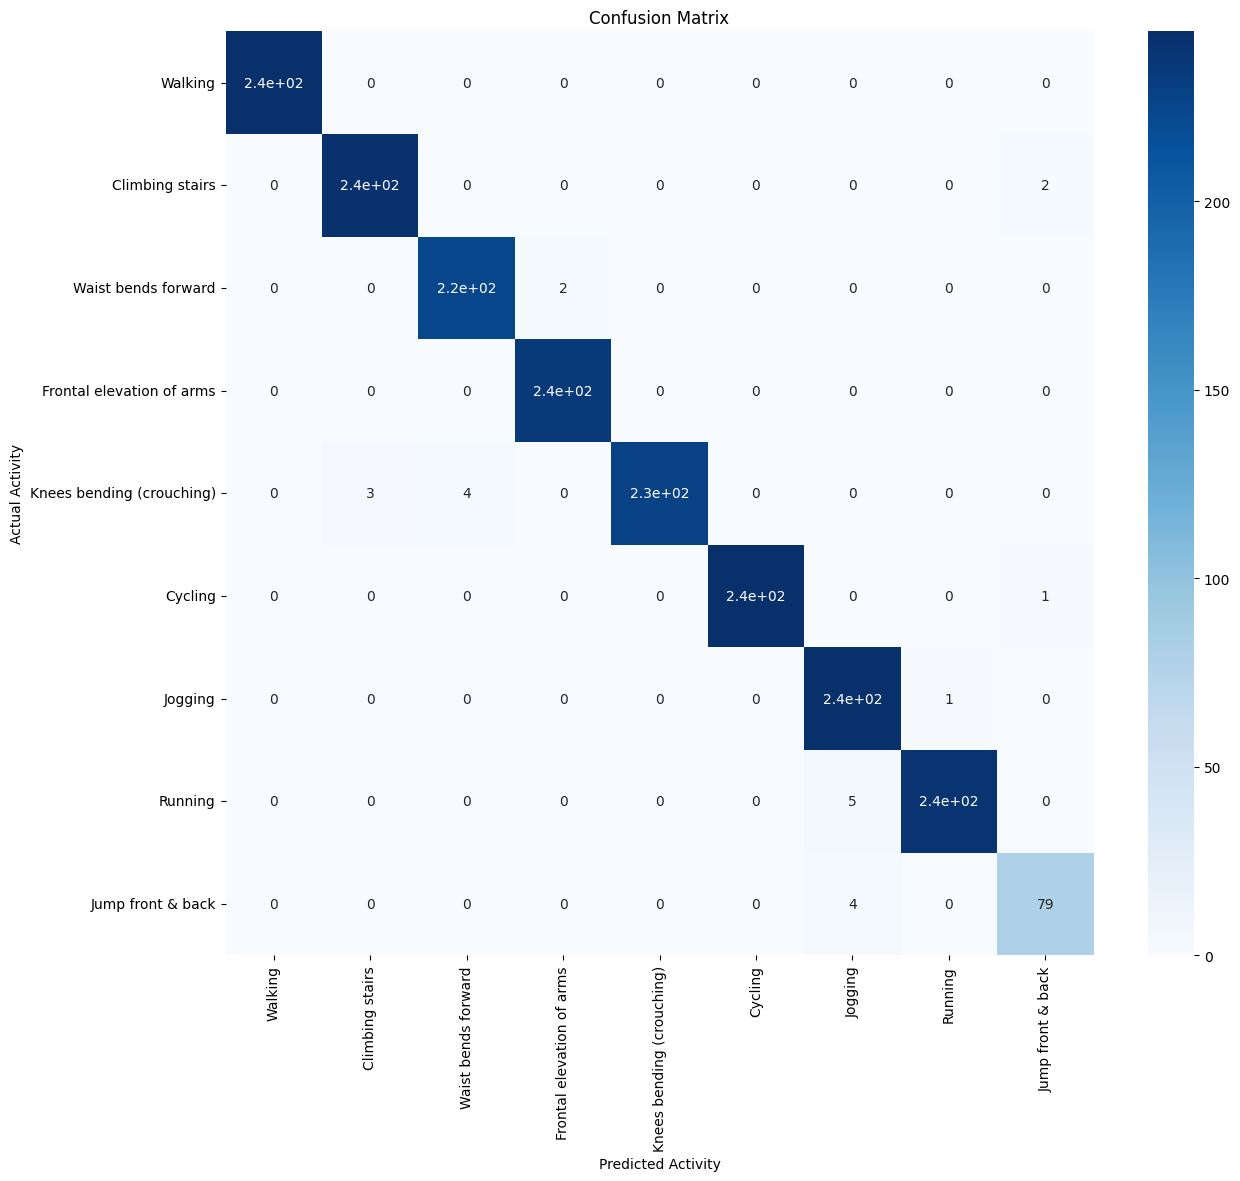

Accuracy Score: 98.9044%
Precision Score: 98.7302%
Recall Score: 98.6287%
F_1 Score: 98.6726%


In [ ]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2 - LSTM1

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))


model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDi  (None, None, 23, 64)      4096      
 stributed)                                                      
                                                                 
 time_distributed_9 (TimeDi  (None, None, 21, 64)      12352     
 stributed)                                                      
                                                                 
 time_distributed_10 (TimeD  (None, None, 21, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_11 (TimeD  (None, None, 10, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_12 (TimeD  (None, None, 640)        

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 7s 13ms/step - loss: 0.7528 - accuracy: 0.7320 - val_loss: 0.1642 - val_accuracy: 0.9546
Epoch 2/10
201/201 [==============================] - 4s 18ms/step - loss: 0.2109 - accuracy: 0.9216 - val_loss: 0.0752 - val_accuracy: 0.9732
Epoch 3/10
201/201 [==============================] - 2s 9ms/step - loss: 0.1420 - accuracy: 0.9494 - val_loss: 0.0610 - val_accuracy: 0.9764
Epoch 4/10
201/201 [==============================] - 2s 8ms/step - loss: 0.0927 - accuracy: 0.9701 - val_loss: 0.0457 - val_accuracy: 0.9832
Epoch 5/10
201/201 [==============================] - 2s 12ms/step - loss: 0.0787 - accuracy: 0.9712 - val_loss: 0.0301 - val_accuracy: 0.9900
Epoch 6/10
201/201 [==============================] - 3s 15ms/step - loss: 0.0511 - accuracy: 0.9833 - val_loss: 0.0338 - val_accuracy: 0.9894
Epoch 7/10
201/201 [==============================] - 3s 15ms/step - loss: 0.0450 - accuracy: 0.9868 - val_loss: 0.0260 - val_accuracy: 0.9919
E

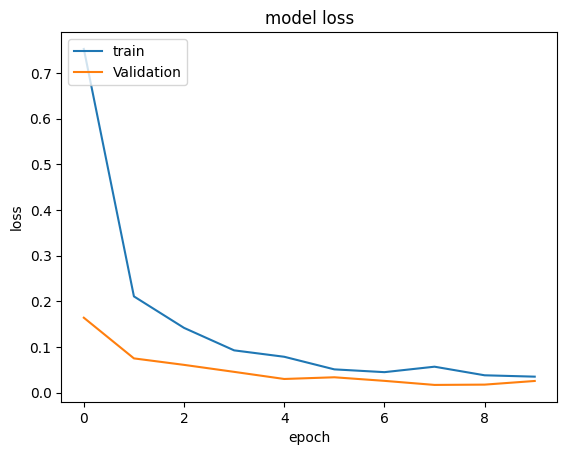

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

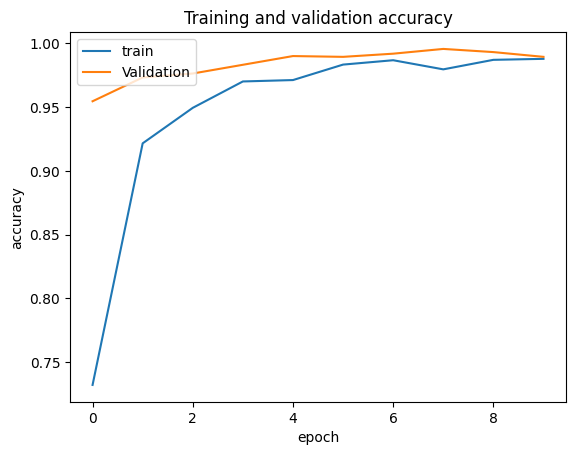

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

63/63 [==============================] - 1s 3ms/step


(2008, 1)

In [ ]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        #0: 'Lying down',
        #1: 'Standing still',
        #2: 'Sitting and relaxing'
        3: 'Walking',
        4: 'Climbing stairs',
        5: 'Waist bends forward',
        6: 'Frontal elevation of arms',
        7: 'Knees bending (crouching)',
        8: 'Cycling',
        9: 'Jogging',
        10: 'Running',
        11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

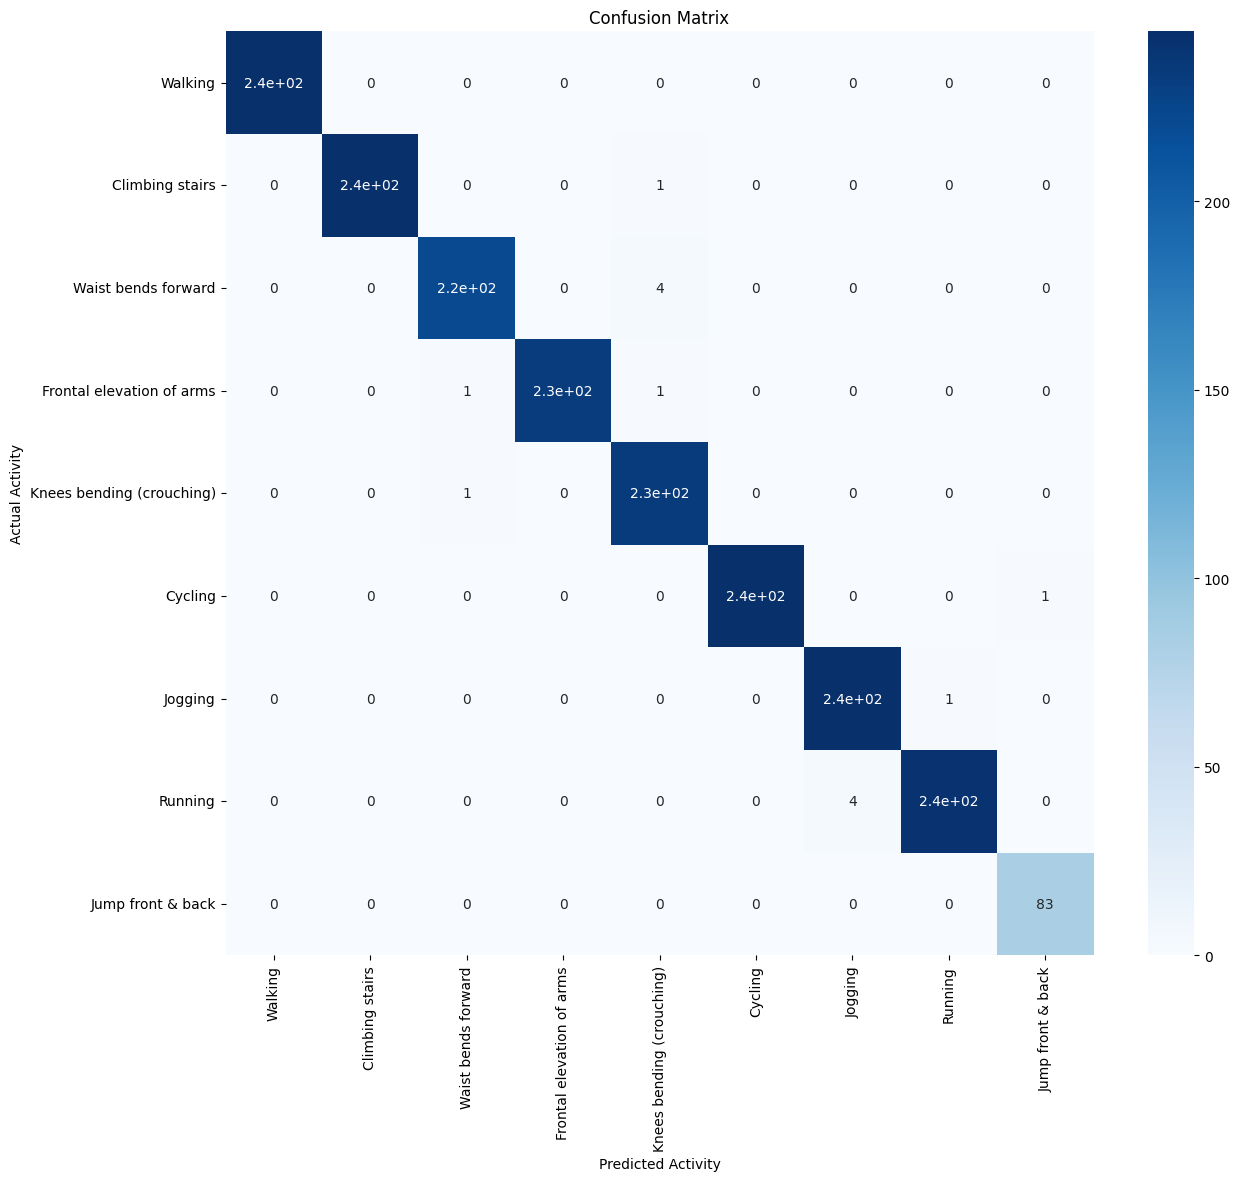

Accuracy Score: 99.3028%
Precision Score: 99.2665%
Recall Score: 99.3453%
F_1 Score: 99.3030%


In [ ]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2 - LSTM2

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_13 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_14 (TimeD  (None, None, 21, 64)      12352     
 istributed)                                                     
                                                                 
 time_distributed_15 (TimeD  (None, None, 21, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_16 (TimeD  (None, None, 10, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_17 (TimeD  (None, None, 640)        

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 9s 16ms/step - loss: 0.8446 - accuracy: 0.6953 - val_loss: 0.1797 - val_accuracy: 0.9291
Epoch 2/10
201/201 [==============================] - 2s 9ms/step - loss: 0.2263 - accuracy: 0.9175 - val_loss: 0.0740 - val_accuracy: 0.9708
Epoch 3/10
201/201 [==============================] - 2s 8ms/step - loss: 0.1399 - accuracy: 0.9514 - val_loss: 0.0476 - val_accuracy: 0.9832
Epoch 4/10
201/201 [==============================] - 2s 9ms/step - loss: 0.1086 - accuracy: 0.9612 - val_loss: 0.0247 - val_accuracy: 0.9925
Epoch 5/10
201/201 [==============================] - 2s 11ms/step - loss: 0.0874 - accuracy: 0.9709 - val_loss: 0.0397 - val_accuracy: 0.9857
Epoch 6/10
201/201 [==============================] - 2s 10ms/step - loss: 0.0717 - accuracy: 0.9739 - val_loss: 0.0218 - val_accuracy: 0.9919
Epoch 7/10
201/201 [==============================] - 2s 9ms/step - loss: 0.0775 - accuracy: 0.9737 - val_loss: 0.0189 - val_accuracy: 0.9919
Epo

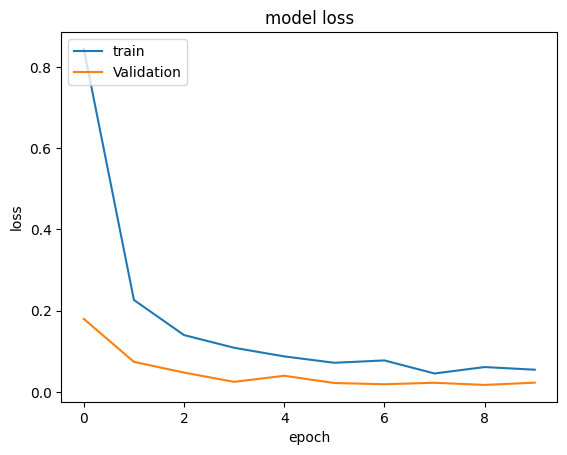

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

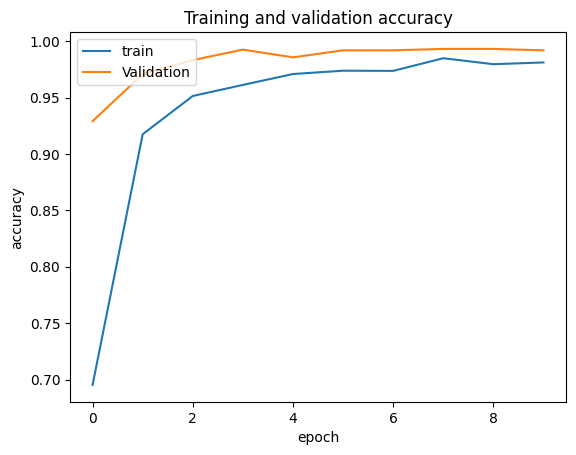

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

63/63 [==============================] - 1s 3ms/step


(2008, 1)

In [ ]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        #0: 'Lying down',
        #1: 'Standing still',
        #2: 'Sitting and relaxing'
        3: 'Walking',
        4: 'Climbing stairs',
        5: 'Waist bends forward',
        6: 'Frontal elevation of arms',
        7: 'Knees bending (crouching)',
        8: 'Cycling',
        9: 'Jogging',
        10: 'Running',
        11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

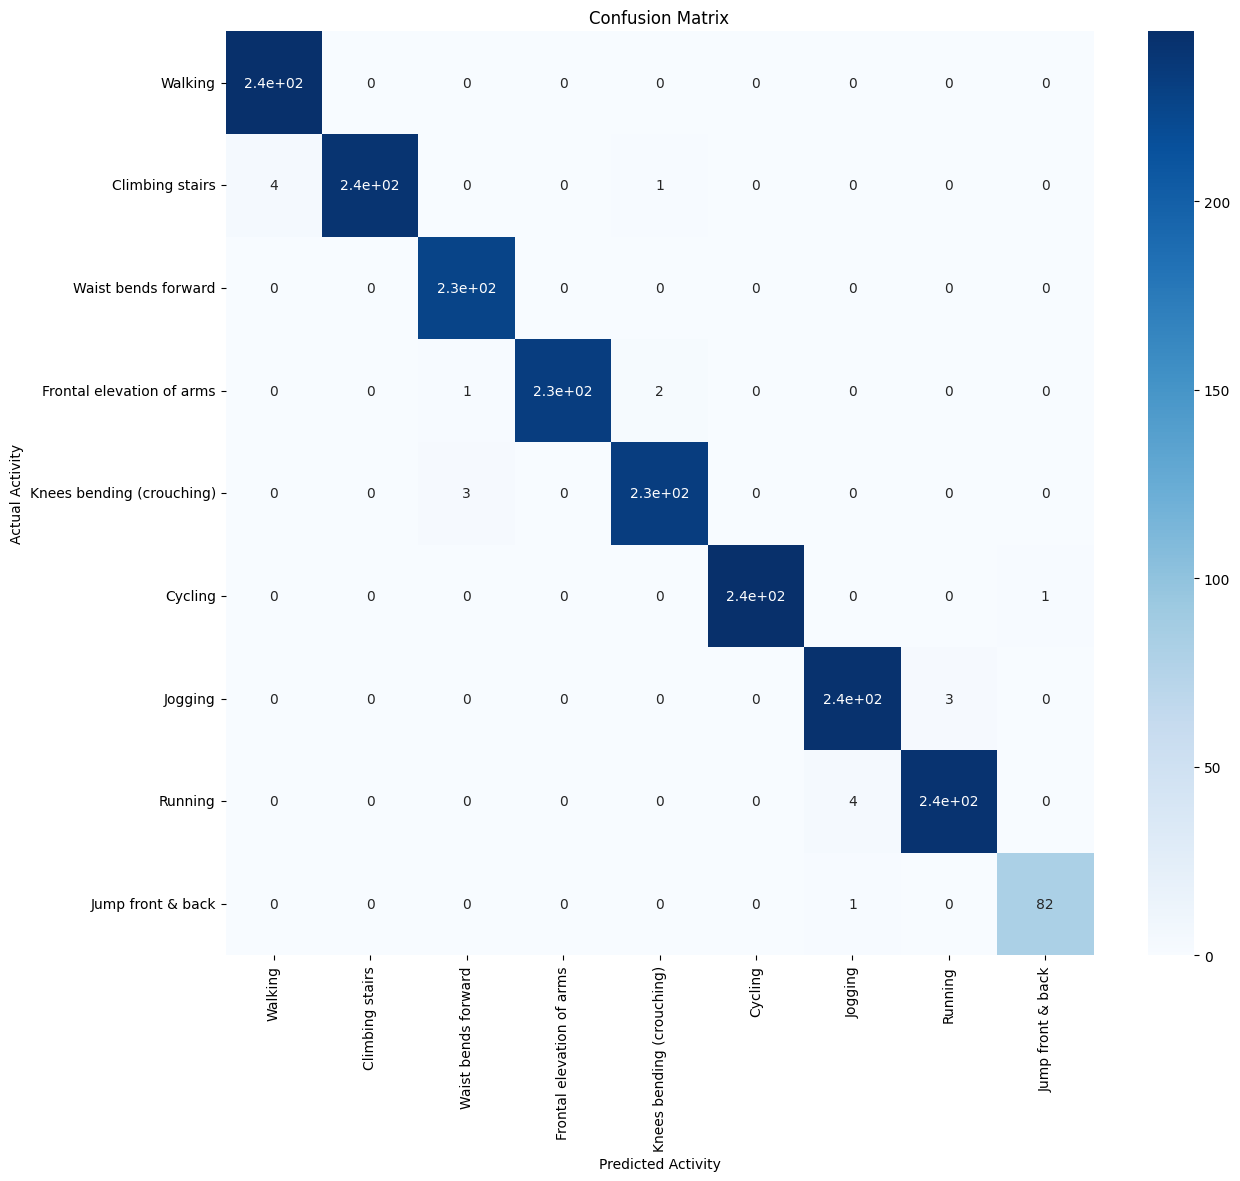

Accuracy Score: 99.0040%
Precision Score: 98.9925%
Recall Score: 98.9953%
F_1 Score: 98.9904%


In [ ]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)